In [1]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
import imutils
import easyocr

# 1. Read in Image, Grayscale and Blur

[[[  0   4   3]
  [  0   1   0]
  [  3   8   7]
  ...
  [ 19  23  18]
  [  1   1   1]
  [  1   1   1]]

 [[  0   1   0]
  [  0   5   4]
  [  5  10   9]
  ...
  [  0   2   0]
  [  1   1   1]
  [  0   0   0]]

 [[  0   1   0]
  [  0   5   4]
  [212 217 216]
  ...
  [176 180 175]
  [  1   1   1]
  [  0   0   0]]

 ...

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]]]


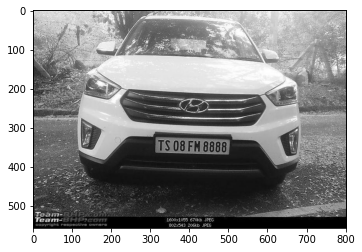

In [22]:
img = cv2.imread('N121.jpeg')
print(img)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(gray, cv2.COLOR_BGR2RGB))

# 2. Apply filter and find edges for localization

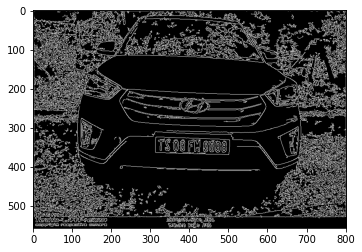

In [23]:
bfilter = cv2.bilateralFilter(gray, 11, 17, 17) #Noise reduction
edged = cv2.Canny(bfilter, 30, 200) #Edge detection
plt.imshow(cv2.cvtColor(edged, cv2.COLOR_BGR2RGB))

# 3. Find Contours and Apply Mask

In [24]:
keypoints = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours = imutils.grab_contours(keypoints)
contours = sorted(contours, key=cv2.contourArea, reverse=True)[:10]

In [25]:
location = None
for contour in contours:
    approx = cv2.approxPolyDP(contour, 10, True)
    if len(approx) == 4:
        location = approx
        break

In [26]:
location

array([[[313, 325]],

       [[314, 364]],

       [[500, 368]],

       [[501, 331]]], dtype=int32)

In [27]:

mask = np.zeros(gray.shape, np.uint8)
new_image = cv2.drawContours(mask, [location], 0,255, -1)
new_image = cv2.bitwise_and(img, img, mask=mask)

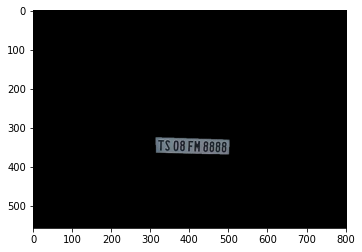

In [28]:

plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))

In [29]:

(x,y) = np.where(mask==255)
(x1, y1) = (np.min(x), np.min(y))
(x2, y2) = (np.max(x), np.max(y))
cropped_image = gray[x1:x2+1, y1:y2+1]

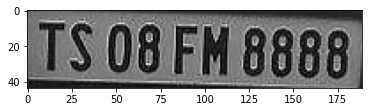

In [30]:

plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))

# 4. Use Easy OCR To Read Text

In [31]:
reader = easyocr.Reader(['en'])
result = reader.readtext(cropped_image)
result


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.
c:\Users\akash biju\AppData\Local\Programs\Python\Python310\lib\site-packages\torchvision\models\_utils.py:252: UserWarning: Accessing the model URLs via the internal dictionary of the module is deprecated since 0.13 and will be removed in 0.15. Please access them via the appropriate Weights Enum instead.
  warnings.warn(
c:\Users\akash biju\AppData\Local\Programs\Python\Python310\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  warnings.warn(
c:\Users\akash biju\AppData\Local\Programs\Python\Python310\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


[([[0, 1], [189, 1], [189, 44], [0, 44]], 'TS 08FM 8888', 0.5265005759116549)]

# Result

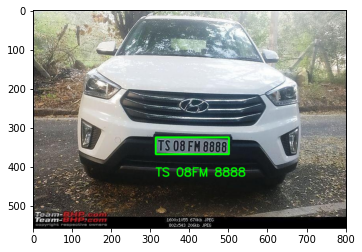

In [32]:
text = result[0][-2]
font = cv2.FONT_HERSHEY_SIMPLEX
res = cv2.putText(img, text=text, org=(approx[0][0][0], approx[1][0][1]+60), fontFace=font, fontScale=1, color=(0,255,0), thickness=2, lineType=cv2.LINE_AA)
res = cv2.rectangle(img, tuple(approx[0][0]), tuple(approx[2][0]), (0,255,0),3)
plt.imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB))

In [33]:

from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from time import sleep

url = "https://Sam-Ayman.github.io"
stuff = "".join(text.strip().split())

driver = webdriver.Chrome('./chromedriver.exe')

driver.get(url)

inp = driver.find_element("xpath", '//*[@id="num"]')
sleep(2)
inp.send_keys(stuff)
sleep(1)
inp.send_keys(Keys.ENTER)
sleep(1)

result = driver.find_element("xpath", '//*[@id="result"]').text

print(result)



C:\Users\akash biju\AppData\Local\Temp\ipykernel_14692\3344539033.py:8: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome('./chromedriver.exe')


not found! 🌚
